# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import re

def solve(s):
    return re.sub(r'(\d)(st|nd|rd|th)', r'\1', s)

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []
date_published = []
rec = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para in parsed_content.find_all("time", {"itemprop": "datePublished"}):
        date_published.append(para.get_text())

    tables = parsed_content.find_all('table')

    for table in tables:
        for row in table.find_all("td", {"class": "review-rating-header recommended"}):
            rec.append(row.find_next("td").get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame({'reviews': reviews, 'date published': date_published, 'recommended': rec})
df.head()

,reviews,date published,recommended
0,✅ Trip Verified | Much better experience this ...,14th December 2023,yes
1,✅ Trip Verified | Once again a terrible busine...,12th December 2023,no
2,✅ Trip Verified | BA A380's are showing their...,12th December 2023,no
3,✅ Trip Verified | Credit to BA - Flew to Sin...,10th December 2023,yes
4,✅ Trip Verified | The check in area for prem...,10th December 2023,yes


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")


df['reviews'] = df['reviews'].str.lower()
df['reviews'] = df['reviews'].str.replace('trip verified', '')
df['reviews'] = df['reviews'].str.replace('not verified', '')
df['reviews'] = df['reviews'].str.replace('verified', '')
df['reviews'] = df['reviews'].str.replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", regex = True)
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviews,date published,recommended
0,much better experience time around flew cpt lh...,14th December 2023,yes
1,terrible business class experience ba flight d...,12th December 2023,no
2,ba a380s showing age hopefully update interior...,12th December 2023,no
3,credit ba flew singapore recently also back do...,10th December 2023,yes
4,check area premium classes gatwick nice queue ...,10th December 2023,yes


In [6]:
nltk.download(['punkt', 'wordnet', 'omw-1.4'])
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

regexp = RegexpTokenizer('\w+')

df['rev_token'] = df['reviews'].apply(regexp.tokenize)
df['rev_string'] = df['rev_token'].apply(lambda x: ' '.join([item for item in x if len(item) > 1]))
df.head()

all_words = ' '.join([word for word in df['rev_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

lemmatizer = nltk.stem.WordNetLemmatizer()

fdist = FreqDist(tokenized_words)

df['rev_string_fdist'] = df['rev_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 5 and len(item) > 1]))

all_words_fdist = ' '.join([word for word in df['rev_string_fdist']])
all_words_lem_fdist = [lemmatizer.lemmatize(w) for w in nltk.tokenize.word_tokenize(all_words_fdist)]
all_words_lem = ' '.join([word for word in all_words_lem_fdist])

df['rev_string_lem'] = df['rev_string_fdist'].apply(lemmatizer.lemmatize)

df.head(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,reviews,date published,recommended,rev_token,rev_string,rev_string_fdist,rev_string_lem
0,much better experience time around flew cpt lh...,14th December 2023,yes,"[much, better, experience, time, around, flew,...",much better experience time around flew cpt lh...,much better experience time around flew cpt lh...,much better experience time around flew cpt lh...
1,terrible business class experience ba flight d...,12th December 2023,no,"[terrible, business, class, experience, ba, fl...",terrible business class experience ba flight d...,terrible business class experience ba flight d...,terrible business class experience ba flight d...


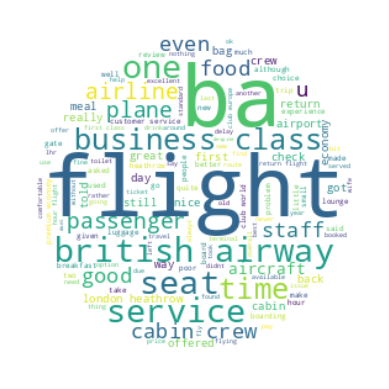

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");
plt.savefig('data/wordcloud.jpg')


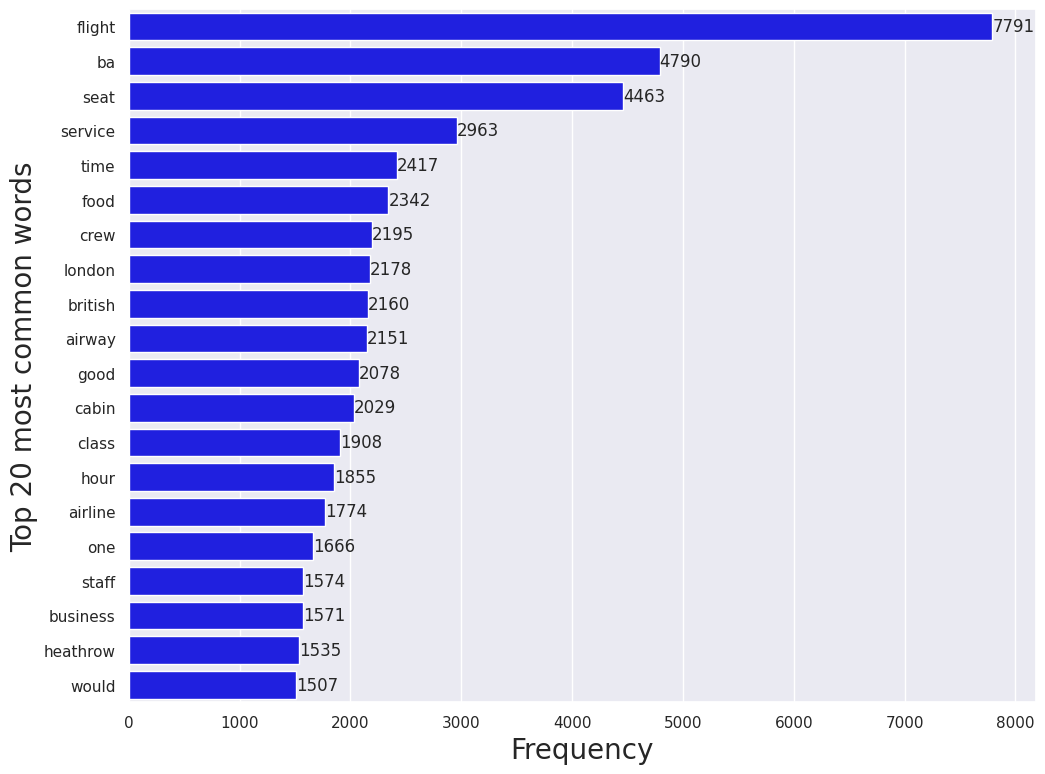

In [8]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(11.7,9)})

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

top_50 = fd.most_common(20)
fdist_series = pd.Series(dict(top_50))
ax = sns.barplot(y=fdist_series.index, x=fdist_series.values, color='blue')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Top 20 most common words', fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.savefig('data/most_common_words_barplot.jpg')

In [9]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['rev_string_lem'].apply(lambda x: analyzer.polarity_scores(x))

df = pd.concat(
    [df.drop('polarity', axis=1),
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,reviews,date published,recommended,rev_token,rev_string,rev_string_fdist,rev_string_lem,neg,neu,pos,compound
0,much better experience time around flew cpt lh...,14th December 2023,yes,"[much, better, experience, time, around, flew,...",much better experience time around flew cpt lh...,much better experience time around flew cpt lh...,much better experience time around flew cpt lh...,0.089,0.665,0.245,0.9939
1,terrible business class experience ba flight d...,12th December 2023,no,"[terrible, business, class, experience, ba, fl...",terrible business class experience ba flight d...,terrible business class experience ba flight d...,terrible business class experience ba flight d...,0.212,0.760,0.028,-0.9313
2,ba a380s showing age hopefully update interior...,12th December 2023,no,"[ba, a380s, showing, age, hopefully, update, i...",ba a380s showing age hopefully update interior...,ba a380s showing age hopefully update interior...,ba a380s showing age hopefully update interior...,0.066,0.608,0.326,0.9100


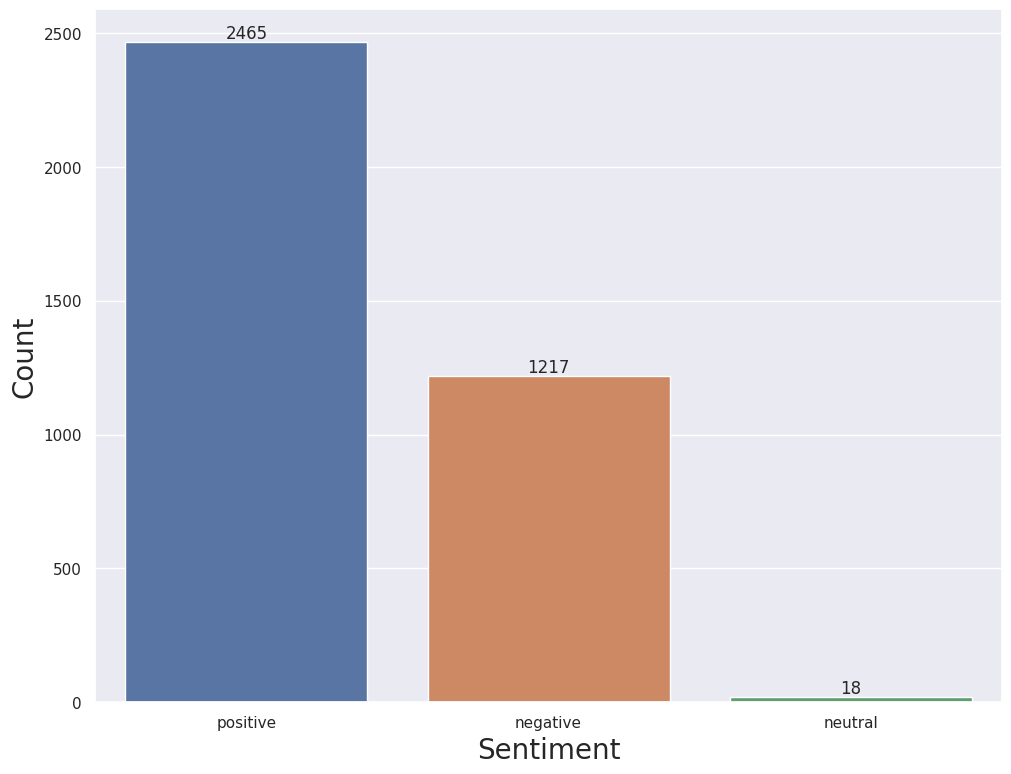

In [10]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
ax = sns.countplot(x='sentiment',
             data=df,
             )

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Sentiment', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.savefig('data/sentiment_countplot.jpg')

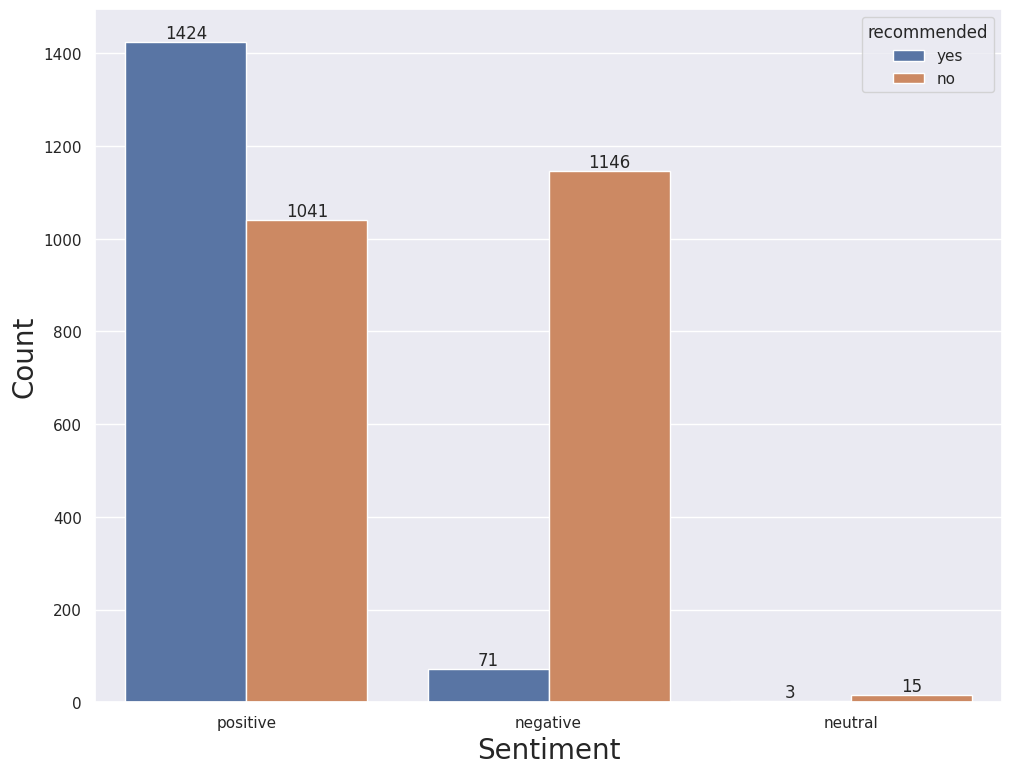

In [11]:
ax1 = sns.countplot(x='sentiment', hue='recommended',
             data=df,
             )

for i in ax1.containers:
    ax1.bar_label(i,)

plt.xlabel('Sentiment', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.savefig('data/sentiment_recommended_countplot.jpg')

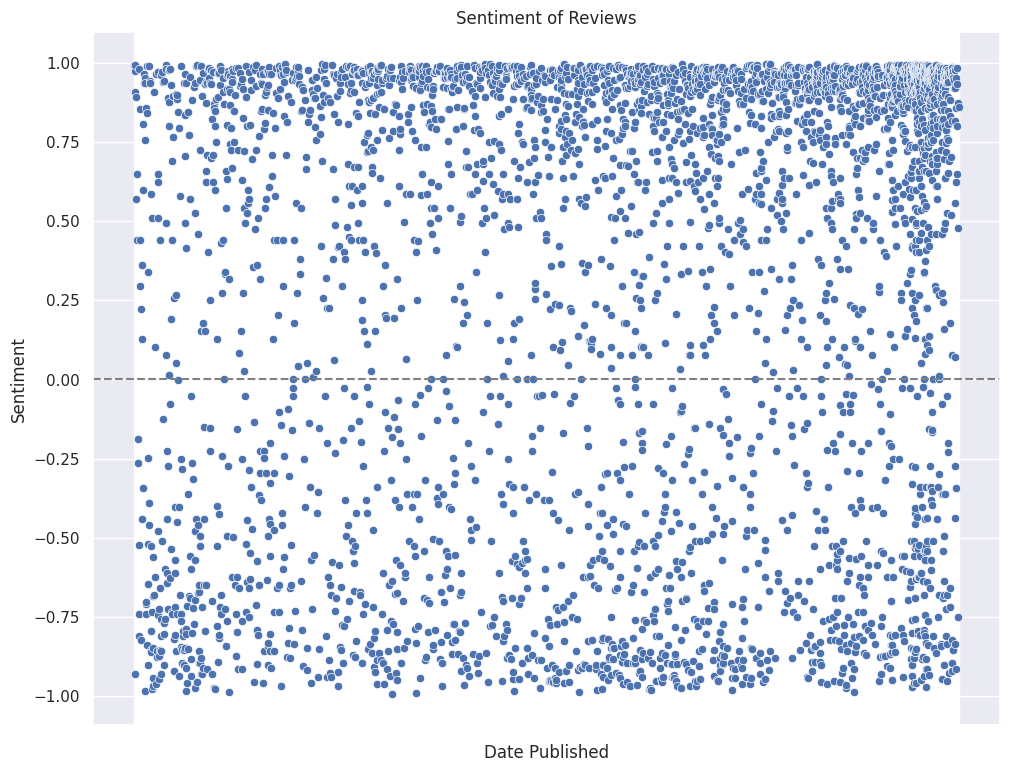

In [12]:
g = sns.scatterplot(x='date published', y='compound', data=df)

g.set(xticklabels=[])
g.set(title='Sentiment of Reviews')
g.set(xlabel="Date Published")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');
plt.savefig('data/sentiment_over_time.jpg')

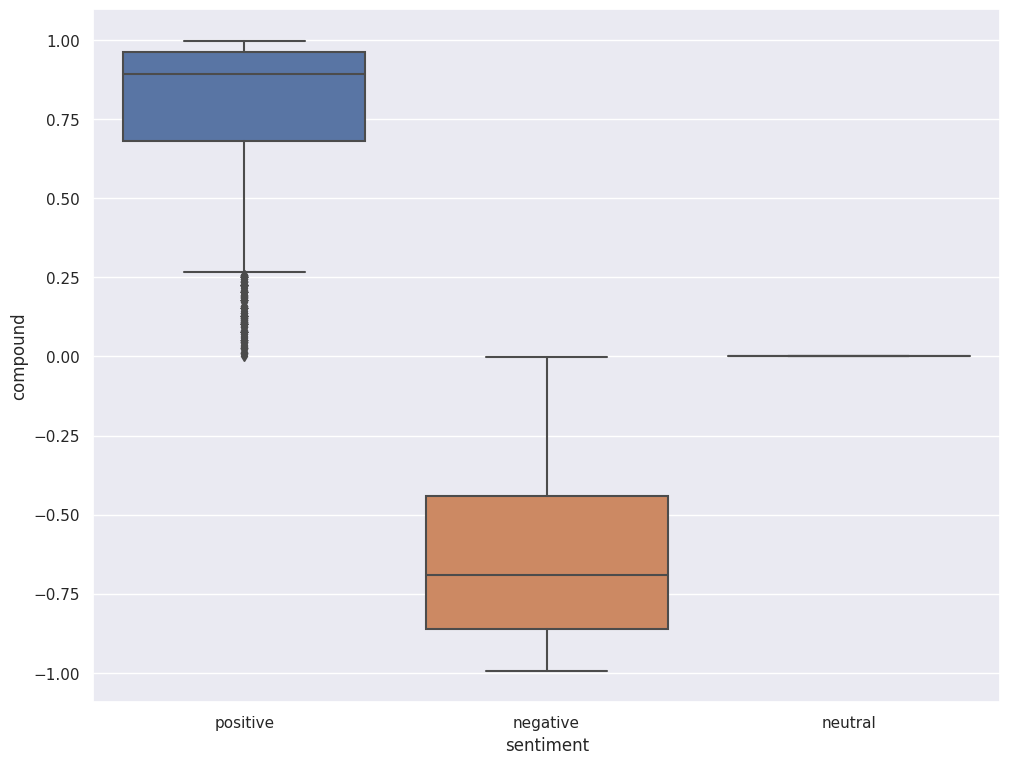

In [13]:
sns.boxplot(y='compound',
            x='sentiment',
            data=df);